In [18]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [19]:
df= pd.read_csv(r"wine.csv", header=None, index_col=False, names=['Quality','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavoured phenolos','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'])
df

,Quality,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavoured phenolos,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
1,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
2,1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050
3,1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,3,13.71,5.65,2.45,20.5,95,1.68,.61,.52,1.06,7.7,.64,1.74,740
175,3,13.4,3.91,2.48,23,102,1.8,.75,.43,1.41,7.3,.7,1.56,750
176,3,13.27,4.28,2.26,20,120,1.59,.69,.43,1.35,10.2,.59,1.56,835
177,3,13.17,2.59,2.37,20,120,1.65,.68,.53,1.46,9.3,.6,1.62,840


In [20]:
X = df.iloc[:, 1:14]
y = df.iloc[:, 0:1]

In [21]:
X

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavoured phenolos,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
2,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050
3,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185
4,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,13.71,5.65,2.45,20.5,95,1.68,.61,.52,1.06,7.7,.64,1.74,740
175,13.4,3.91,2.48,23,102,1.8,.75,.43,1.41,7.3,.7,1.56,750
176,13.27,4.28,2.26,20,120,1.59,.69,.43,1.35,10.2,.59,1.56,835
177,13.17,2.59,2.37,20,120,1.65,.68,.53,1.46,9.3,.6,1.62,840


In [22]:
y

,Quality
0,Wine
1,1
2,1
3,1
4,1
...,...
174,3
175,3
176,3
177,3


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=408, stratify=y)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
#define pipeline: scaling + MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


In [ ]:
pipe = Pipeline(steps=[('scaler', StandardScaler()), ('MLP', MLPClassifier(max_iter=1500, random_state=408))])

In [ ]:
#define hyper parameter grid
para_grid = {'MLP__hidden_layer_sizes': [(10,),(10,10),(5,10),(5,)], 'MLP__activation': ['relu', 'tanh'], 'MLP__solver': ['adam', 'sgd'], 'MLP__learning_rate': ['constant', 'adaptive'], 'MLP__alpha': [0.0001, 0.001]}

In [ ]:
#define grid search
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipe, param_grid=para_grid, cv=10, scoring='accuracy', verbose=1)

In [ ]:
grid_search.fit(X_train, y_train.values.reshape(-1))

Fitting 10 folds for each of 64 candidates, totalling 640 fits


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\

ValueError: could not convert string to float: 'Alcohol'

In [ ]:
estimators = grid_search.cv_results_['params']

In [ ]:
estimators_df = pd.DataFrame(estimators)

In [ ]:
all_estimators = grid_search.cv_results_

In [ ]:
all_estimators_df = pd.DataFrame(all_estimators)

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
y_pred

array([3, 3, 2, 1, 2, 3, 2, 1, 1, 2, 2, 3, 2, 1, 2, 3, 3, 3, 1, 1, 2, 3,
       2, 3, 2, 2, 2, 2, 1, 1, 1, 2, 1, 3, 1, 1])

In [ ]:
grid_search.best_params_

{'MLP__activation': 'relu',
 'MLP__alpha': 0.0001,
 'MLP__hidden_layer_sizes': (5,),
 'MLP__learning_rate': 'constant',
 'MLP__solver': 'sgd'}

In [ ]:
from sklearn.preprocessing import label_binarize

In [ ]:
y_test_bin = label_binarize(y_test, classes=np.unique(y))

In [ ]:
y_test_bin

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [ ]:
y_scores = label_binarize(y_pred, classes=np.unique(y))

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc, precision_score
from sklearn.metrics import recall_score, f1_score
import matplotlib.pyplot as plt

In [ ]:
n_classes = y_test_bin.shape[1]

In [ ]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

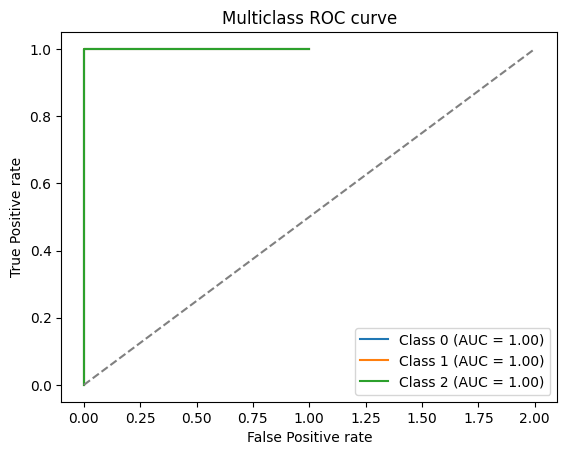

In [ ]:
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0,2], [0,1], color = 'gray', linestyle='--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Multiclass ROC curve')
plt.legend(loc="lower right")

In [ ]:
precision = precision_score(y_test, y_pred=y_test, average='macro')
precision

1.0

In [ ]:
recall = recall_score(y_test, y_pred=y_pred, average='macro')
recall

1.0

In [ ]:
f1 = f1_score(y_test, y_pred=y_pred, average='macro')
f1

1.0

In [ ]:
confusion_matrix()